In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load data
df = pd.read_excel('RetailSalesData.xlsx')
print(df)

    OrderID                    Date CustomerName     Product     Category  \
0   ORD0001 2025-03-15 09:25:44.781          Eve      Laptop  Electronics   
1   ORD0002 2025-03-16 09:25:44.781          Eve    Backpack  Accessories   
2   ORD0003 2025-05-16 09:25:44.781      Charlie       Watch  Accessories   
3   ORD0004 2025-03-31 09:25:44.781      Charlie    Backpack  Accessories   
4   ORD0005 2025-06-12 09:25:44.781      Charlie       Watch  Accessories   
..      ...                     ...          ...         ...          ...   
95  ORD0096 2025-05-22 09:25:44.781      Charlie  Headphones  Electronics   
96  ORD0097 2025-02-06 09:25:44.781      Charlie    Backpack  Accessories   
97  ORD0098 2025-01-31 09:25:44.781        David       Watch  Accessories   
98  ORD0099 2025-05-19 09:25:44.781      Charlie      Laptop  Electronics   
99  ORD0100 2025-03-21 09:25:44.781        Frank      Laptop  Electronics   

   Region  Quantity  UnitPrice  TotalSales PaymentMethod  
0   North       

In [ ]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
# Basic EDA
print('Shape:', df.shape)
print(df.info())
print(df.describe())
print('Missing values:\n', df.isnull().sum())

Shape: (100, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   OrderID        100 non-null    object        
 1   Date           100 non-null    datetime64[ns]
 2   CustomerName   100 non-null    object        
 3   Product        100 non-null    object        
 4   Category       100 non-null    object        
 5   Region         100 non-null    object        
 6   Quantity       100 non-null    int64         
 7   UnitPrice      100 non-null    float64       
 8   TotalSales     100 non-null    float64       
 9   PaymentMethod  100 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 7.9+ KB
None
                                Date    Quantity   UnitPrice   TotalSales
count                            100  100.000000  100.000000   100.000000
mean   2025-04-23 10:23:20.781000

In [5]:
# Total Revenue
total_revenue = df['TotalSales'].sum()
print(f'\nTotal Revenue: ₹{total_revenue:,.2f}')


Total Revenue: ₹135,060.34


In [6]:
# Top 5 Products by Revenue
top_products = df.groupby('Product')['TotalSales'].sum().sort_values(ascending=False).head(5)
print('\nTop 5 Products by Revenue:\n', top_products)


Top 5 Products by Revenue:
 Product
Laptop        34122.79
Shoes         22704.72
Headphones    20947.56
Backpack      19954.16
Watch         19183.85
Name: TotalSales, dtype: float64


In [7]:
# Top 5 Customers by Spending
top_customers = df.groupby('CustomerName')['TotalSales'].sum().sort_values(ascending=False).head(5)
print('\nTop 5 Customers by Spending:\n', top_customers)


Top 5 Customers by Spending:
 CustomerName
Charlie    29324.64
David      19609.51
Bob        17547.36
Grace      16241.87
Frank      15360.22
Name: TotalSales, dtype: float64


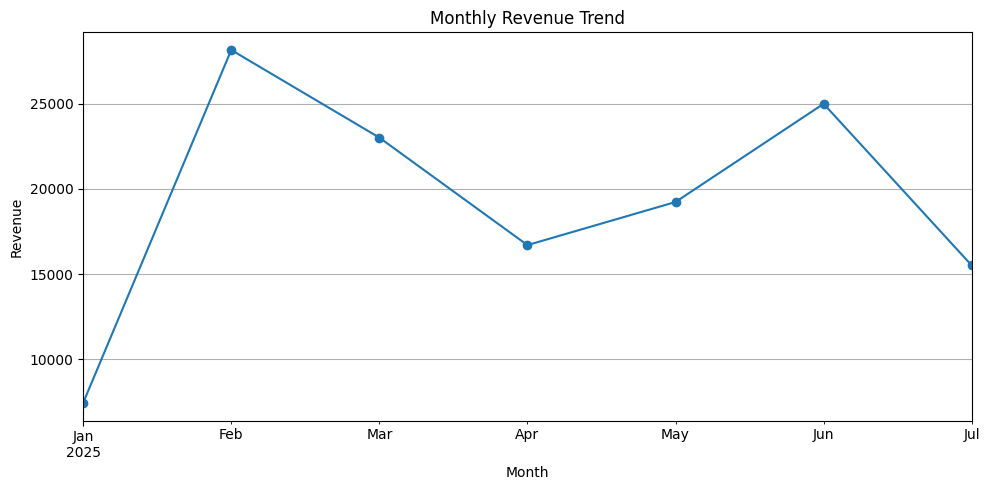

In [8]:
# Monthly Revenue Trend
df['Month'] = df['Date'].dt.to_period('M')
monthly_revenue = df.groupby('Month')['TotalSales'].sum()

monthly_revenue.plot(kind='line', marker='o', figsize=(10, 5), title='Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\MyLaptop HP\AppData\Local\Temp\ipykernel_10536\2934612631.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.values, y=category_revenue.index, palette='mako')


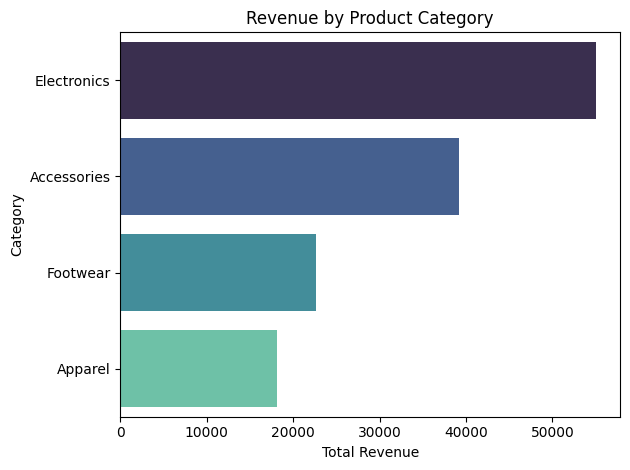

In [14]:
# Revenue by Category
category_revenue = df.groupby('Category')['TotalSales'].sum().sort_values(ascending=False)

sns.barplot(x=category_revenue.values, y=category_revenue.index, palette='mako')
plt.title('Revenue by Product Category')
plt.xlabel('Total Revenue')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

C:\Users\MyLaptop HP\AppData\Local\Temp\ipykernel_10536\2230529061.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='pastel')


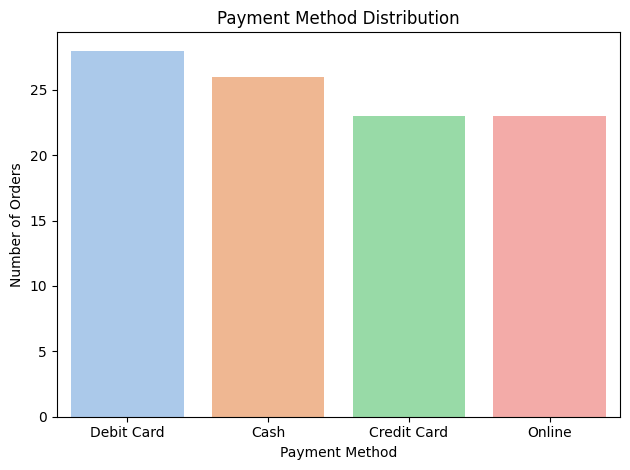

In [10]:
# Payment Method Distribution
payment_counts = df['PaymentMethod'].value_counts()

sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='pastel')
plt.title('Payment Method Distribution')
plt.ylabel('Number of Orders')
plt.xlabel('Payment Method')
plt.tight_layout()
plt.show()